In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

import statsmodels.api as sm

In [6]:
pd.options.display.float_format = '{:.6f}'.format

data = pd.read_csv('dataset_limpio.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
pd.set_option('display.max_columns', None)

## Algoritmos

In [8]:
#Genero mi variable X
X=data.drop(['price'],axis=1)

#Genero la variable y
y = data['price'].squeeze()

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10,shuffle=True)

### Linear Regression

In [9]:
#Entrenamos modelo LR
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

#Predecimos
lr_prediction = model_lr.predict(X_test)
lr_prediction_train = model_lr.predict(X_train)

In [10]:
intercept_lr = model_lr.intercept_
coeff_lr = model_lr.coef_
r2_test_lr = model_lr.score(X_test, y_test)
r2_train_lr = model_lr.score(X_train, y_train)
n = len(y_test)
p = np.count_nonzero(coeff_lr)
r2_adj_test_lr = 1-((1-r2_test_lr)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lr = 1-((1-r2_train_lr)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lr = mean_squared_error(y_test, lr_prediction)
mse_train_lr = mean_squared_error(y_train, lr_prediction_train)
mae_test_lr = mean_absolute_error(y_test, lr_prediction)
mae_train_lr = mean_absolute_error(y_train, lr_prediction_train)
rmse_test_lr = np.sqrt(mse_test_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

In [11]:
#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lr=[mse_test_lr, mse_train_lr,
            mae_test_lr, mae_train_lr, 
            rmse_test_lr,rmse_train_lr,
            r2_test_lr,r2_train_lr,
            r2_adj_test_lr,r2_adj_train_lr
         ]

stats_dataframe_lr=pd.DataFrame({'LR':stats_lr},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
print(stats_dataframe_lr)


                          LR
MSE Test     29373633.141659
MSE Train    32600619.031856
MAE Test         3189.956699
MAE Train        3219.129716
RMSE Test        5419.744749
RMSE Train       5709.695179
R2 Test             0.365860
R2 Train            0.354244
R2 Adj Test         0.354737
R2 Adj Train        0.349437


In [12]:
print("Intercept:", intercept_lr)
print("Coeficientes:")
print(print(pd.Series(coeff_lr, index=X.columns)))

Intercept: 4853.508711173124
Coeficientes:
host_is_superhost            6.519793
host_has_profile_pic      -552.993952
host_identity_verified    -752.674319
accommodates              1407.201735
bathrooms                 2486.906115
                             ...     
room_type_Hotel room      1375.011262
room_type_Private room    -452.590537
room_type_Shared room    -1239.244696
bathroomtype_private       963.466202
bathroomtype_shared       -963.466202
Length: 90, dtype: float64
None


### OLS

In [13]:
#Entrenamos modelo OLS
X_train_sm = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_sm).fit()

#Predecimos
X_test_sm = sm.add_constant(X_test)
sm_prediction = model_ols.predict(X_test_sm)

X_train_sm = sm.add_constant(X_train)
sm_prediction_train = model_ols.predict(X_train_sm)

In [14]:
r2_test_ols = r2_score(y_test,sm_prediction)
r2_train_ols = r2_score(y_train,sm_prediction_train)
r2_adj_test_ols = sm.OLS(y_test, X_test_sm).fit().rsquared_adj
r2_adj_train_ols = model_ols.rsquared_adj
mse_test_ols = mean_squared_error(y_test, sm_prediction)
mse_train_ols = mean_squared_error(y_train, sm_prediction_train)
mae_test_ols = mean_absolute_error(y_test, sm_prediction)
mae_train_ols = mean_absolute_error(y_train, sm_prediction_train)
rmse_test_ols = np.sqrt(mse_test_ols)
rmse_train_ols = np.sqrt(mse_train_ols)

In [15]:
#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ols=[mse_test_ols, mse_train_ols,
            mae_test_ols, mae_train_ols, 
            rmse_test_ols,rmse_train_ols,
            r2_test_ols,r2_train_ols,
            r2_adj_test_ols,r2_adj_train_ols
         ]

stats_dataframe_ols=pd.DataFrame({'OLS':stats_ols},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
print(stats_dataframe_ols)

                         OLS
MSE Test     29373633.141661
MSE Train    32600619.031856
MAE Test         3189.956699
MAE Train        3219.129716
RMSE Test        5419.744749
RMSE Train       5709.695179
R2 Test             0.365860
R2 Train            0.354244
R2 Adj Test         0.380151
R2 Adj Train        0.349653


In [16]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     77.15
Date:                Sat, 29 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:43:54   Log-Likelihood:            -1.2266e+05
No. Observations:               12182   AIC:                         2.455e+05
Df Residuals:                   12095   BIC:                         2.461e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

### Lasso

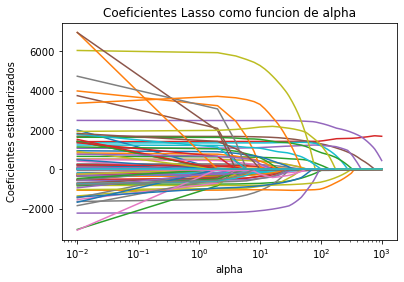

In [17]:
#Análisis previo de los alpha
alphas_lasso = np.linspace(0.01,1000,500)
lasso = linear_model.Lasso(max_iter = 10000, normalize = False)
coefs = []

for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas_lasso, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Lasso como funcion de alpha');

In [18]:
#Creamos el modelo
lassocv = linear_model.LassoCV(alphas=None,normalize=False,cv=10,random_state=10, max_iter=10000)

#Lo entrenamos
model_lasso = lassocv.fit(X_train, y_train)

#Lo probamos
lasso_prediction = model_lasso.predict(X_test)
lasso_prediction_train = model_lasso.predict(X_train)

In [19]:
alpha_lasso = model_lasso.alpha_
coeff_lasso = model_lasso.coef_
intercept_lasso = model_lasso.intercept_
r2_test_lasso = model_lasso.score(X_test, y_test)
r2_train_lasso = model_lasso.score(X_train, y_train)
p = np.count_nonzero(coeff_lasso)
r2_adj_test_lasso = 1-((1-r2_test_lasso)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lasso = 1-((1-r2_train_lasso)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lasso = mean_squared_error(y_test, lasso_prediction)
mse_train_lasso = mean_squared_error(y_train, lasso_prediction_train)
mae_test_lasso = mean_absolute_error(y_test, lasso_prediction)
mae_train_lasso = mean_absolute_error(y_train, lasso_prediction_train)
rmse_test_lasso = np.sqrt(mse_test_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)

In [20]:
#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lasso = [mse_test_lasso, mse_train_lasso,
                mae_test_lasso, mae_train_lasso, 
                rmse_test_lasso,rmse_train_lasso,
                r2_test_lasso,r2_train_lasso,
                r2_adj_test_lasso,r2_adj_train_lasso
                ]

stats_dataframe_lasso =pd.DataFrame({'Lasso':stats_lasso},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lasso

,Lasso
MSE Test,34653909.573000
MSE Train,38826968.249612
MAE Test,3458.632625
MAE Train,3532.051353
RMSE Test,5886.757136
RMSE Train,6231.128971
R2 Test,0.251865
R2 Train,0.230912
R2 Adj Test,0.251005
R2 Adj Train,0.230533


### Ridge

In [21]:
alphas_ridge = np.logspace(-10, 10, 400)

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43352e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99906e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.62235e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.31754e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.8509e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.13278e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.44198e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.78111e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16915e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28225e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40628e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.5423e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

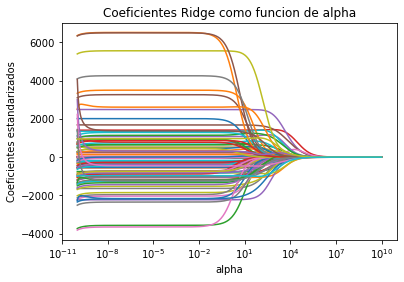

In [22]:
#Análisis previo de los alpha
alphas_ridge = np.logspace(-10, 10, 500)
ridge = linear_model.Ridge(max_iter=10000)
coefs = []

for a in alphas_ridge:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas_ridge, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Ridge como funcion de alpha');

In [23]:
#Creamos el modelo
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge,normalize=False,cv=10)

#Lo entrenamos
model_ridge = ridgecv.fit(X_train, y_train)

#Lo probamos
ridge_prediction = model_ridge.predict(X_test)
ridge_prediction_train = model_ridge.predict(X_train)


E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.46034e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.61767e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.24082e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.34302e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1664e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.96333e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.58999e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.57402e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.27584e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26342e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68518e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.17781e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.56231e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.00973e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.43826e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37043e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04372e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.52645e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.64098e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.09175e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.11256e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.59018e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.81373e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.62706e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.34721e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.38408e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.88579e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.08374e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.27511e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.74025e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.6744e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.65434e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.32209e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.36075e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.409e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3026e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Lin

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0016e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04364e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95372e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.98756e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.91877e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.95684e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.86749e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89421e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.24554e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.2778e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.18947e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.2059e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.07257e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.16328e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.02415e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.16491e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.85246e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.83e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.94066e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.77153e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Lin

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28189e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29581e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27456e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29569e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85888e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87694e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84944e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87659e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.46266e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.45352e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.7012e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.6935e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.55386e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.91213e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.9008e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.93351e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.12984e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.15283e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.14546e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.66374e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.42229e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.45363e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.44775e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.19747e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0819e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07383e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07817e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0778e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.5654e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.5535e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55958e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.55953e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24735e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25595e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25635e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48327e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.251e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.26325e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.2643e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.59256e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Lin

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.70278e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.72032e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.72232e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.19714e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.88157e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.85164e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.8566e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.8028e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.88707e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.95842e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.85029e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.95448e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

In [24]:
alpha_ridge = model_ridge.alpha_
coeff_ridge = model_ridge.coef_
intercept_ridge = model_ridge.intercept_
r2_test_ridge = model_ridge.score(X_test, y_test)
r2_train_ridge = model_ridge.score(X_train, y_train)
p = np.count_nonzero(coeff_ridge)
r2_adj_test_ridge = 1-((1-r2_test_ridge)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_ridge = 1-((1-r2_train_ridge)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_ridge = mean_squared_error(y_test, ridge_prediction)
mse_train_ridge = mean_squared_error(y_train, ridge_prediction_train)
mae_test_ridge = mean_absolute_error(y_test, ridge_prediction)
mae_train_ridge = mean_absolute_error(y_train, ridge_prediction_train)
rmse_test_ridge = np.sqrt(mse_test_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)

In [25]:
#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ridge = [mse_test_ridge, mse_train_ridge,
                mae_test_ridge, mae_train_ridge, 
                rmse_test_ridge,rmse_train_ridge,
                r2_test_ridge,r2_train_ridge,
                r2_adj_test_ridge,r2_adj_train_ridge
                ]

stats_dataframe_ridge =pd.DataFrame({'Ridge':stats_ridge},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_ridge

,Ridge
MSE Test,29272192.486577
MSE Train,32704568.493860
MAE Test,3168.196111
MAE Train,3207.540277
RMSE Test,5410.378220
RMSE Train,5718.790824
R2 Test,0.368050
R2 Train,0.352185
R2 Adj Test,0.356965
R2 Adj Train,0.347363


### ElasticNet

In [26]:
model_en = ElasticNet(random_state = 0)

In [27]:
model_en.fit(X_train, y_train)

ElasticNet(random_state=0)

In [28]:
elasticnet_prediction = model_en.predict(X_test)
elasticnet_prediction_train = model_en.predict(X_train)

In [29]:
coeff_en = model_en.coef_
intercept_en = model_en.intercept_
r2_test_en = model_en.score(X_test, y_test)
r2_train_en = model_en.score(X_train, y_train)
p = np.count_nonzero(coeff_en)
r2_adj_test_en = 1-((1-r2_test_en)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_en = 1-((1-r2_train_en)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_en = mean_squared_error(y_test, elasticnet_prediction)
mse_train_en = mean_squared_error(y_train, elasticnet_prediction_train)
mae_test_en = mean_absolute_error(y_test, elasticnet_prediction)
mae_train_en = mean_absolute_error(y_train, elasticnet_prediction_train)
rmse_test_en = np.sqrt(mse_test_en)
rmse_train_en = np.sqrt(mse_train_en)

In [30]:
#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_en = [mse_test_en, mse_train_en,
                mae_test_en, mae_train_en, 
                rmse_test_en,rmse_train_en,
                r2_test_en,r2_train_en,
                r2_adj_test_en,r2_adj_train_en
                ]

stats_dataframe_en =pd.DataFrame({'ElasticNet':stats_en},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_en

,ElasticNet
MSE Test,32531133.887214
MSE Train,36600038.870854
MAE Test,3279.550449
MAE Train,3353.920631
RMSE Test,5703.607094
RMSE Train,6049.796597
R2 Test,0.297693
R2 Train,0.275023
R2 Adj Test,0.286209
R2 Adj Train,0.269989


## Comparacion de modelos

In [31]:
# Valores estadísticos
pd.concat([stats_dataframe_lr,stats_dataframe_ols,stats_dataframe_lasso,stats_dataframe_ridge, stats_dataframe_en],axis=1)

,LR,OLS,Lasso,Ridge,ElasticNet
MSE Test,29373633.141659,29373633.141661,34653909.573000,29272192.486577,32531133.887214
MSE Train,32600619.031856,32600619.031856,38826968.249612,32704568.493860,36600038.870854
MAE Test,3189.956699,3189.956699,3458.632625,3168.196111,3279.550449
MAE Train,3219.129716,3219.129716,3532.051353,3207.540277,3353.920631
RMSE Test,5419.744749,5419.744749,5886.757136,5410.378220,5703.607094
RMSE Train,5709.695179,5709.695179,6231.128971,5718.790824,6049.796597
R2 Test,0.365860,0.365860,0.251865,0.368050,0.297693
R2 Train,0.354244,0.354244,0.230912,0.352185,0.275023
R2 Adj Test,0.354737,0.380151,0.251005,0.356965,0.286209
R2 Adj Train,0.349437,0.349653,0.230533,0.347363,0.269989


Lasso es quien tiene menos MSE Test, MAE Test y RMSE Test. Sin embargo, si evaluamos mediante R2 Adj Test, el mejor modelo es OLS

In [32]:
#Cross Validation entre Lineal, Lasso, Ridge y OLS
cv_scores_mean = []

model1=model_lr
model2=model_lasso
model3=model_ridge
model4=model_en
#model5=model_ols

modelos=[model1, model2, model3, model4]

for modelo in modelos:
    cv_score = cross_val_score(modelo, X_train, y_train, cv=5)
    cv_scores_mean.append(cv_score.mean())


pd.DataFrame({'CV':cv_scores_mean},index=["Linear Regression", "Lasso", "Ridge", "EN"])

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.90788e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.42307e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.47793e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.60402e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.88767e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.51307e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26079e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.06226e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24496e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86174e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64893e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.92197e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72072e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31699e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.10596e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.59139e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.36599e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.96038e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.54802e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.35078e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.26296e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.6696e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.00659e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.76461e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.37757e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.61976e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.04195e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.37954e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11612e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07962e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10302e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04772e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54277e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59942e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.58247e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6151e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.32419e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.3024e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.33688e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.28944e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.37258e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.34379e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.38094e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.32433e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.85044e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.89118e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.82127e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.83456e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.07578e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.98683e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.99386e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.9868e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02358e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0119e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01175e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0136e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46499e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46358e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46915e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.4712e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11715e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12811e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12951e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34446e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.08131e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.08177e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39631e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.36096e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.43975e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.43006e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46011e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.45918e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.50852e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.46452e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.483e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.42341e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.34136e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.41572e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.35234e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.37777e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34317e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35154e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.3621e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35296e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94312e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95532e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9704e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9572e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82869e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.85047e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83124e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.83835e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.11616e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.06628e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.09203e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.12309e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.95456e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.88211e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.91946e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.96436e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.74301e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.80625e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.79883e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.61381e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.3308e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.19078e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.93343e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.53025e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26885e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.27049e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.32034e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14133e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08001e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.85409e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.86928e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10798e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34723e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.93462e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.7907e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.73718e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.1149e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.48322e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.46211e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.57805e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.12394e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.10412e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.36739e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.97413e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.10294e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.49877e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.47923e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.9644e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02936e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.09794e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05303e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05147e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52568e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61203e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61697e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52719e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.33182e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34236e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.24769e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31973e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.3201e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.28839e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.36185e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39175e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.42343e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.82419e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.79615e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.86787e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.00024e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.97721e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.05759e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.10561e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.28937e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.27963e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0148e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0132e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33037e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34467e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34328e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.47012e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94134e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95272e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.932e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9268e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Lin

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81205e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82555e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.79716e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.78956e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.07155e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.0881e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.04862e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.03753e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.89344e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.91439e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.85888e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.84274e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.52748e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.59419e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.52879e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.55613e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24319e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23408e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.23774e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22652e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78545e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78416e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.79832e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7855e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.57761e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.58307e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.58097e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.60132e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.40139e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.72876e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73682e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73339e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.88444e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.9251e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.92023e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.3939e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.08536e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.06562e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.12429e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.11725e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03404e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02493e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02207e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03054e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.98228e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21145e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.28226e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.08686e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52525e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7601e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.60724e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.32789e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35095e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42288e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77885e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29838e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.33255e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.49086e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5448e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.90295e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.51707e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.97956e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.14467e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.18682e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.69331e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.3673e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.53899e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.57433e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.52577e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.84501e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.08238e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10061e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38932e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38237e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.40894e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44076e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.0613e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.10239e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14728e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04654e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07754e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.98226e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.02002e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.05445e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.01345e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.04291e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.43541e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.462e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.92957e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.79455e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.7754e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.83776e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.48785e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.48315e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.57805e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.41911e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22722e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.2317e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22847e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24091e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7883e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.7807e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78558e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77837e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.58784e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5813e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.58679e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5738e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.74439e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73938e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.74575e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.72441e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.41457e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.42219e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.38879e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.43345e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.84718e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.79632e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.85961e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.78041e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13377e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.13428e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1355e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12788e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6429e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63163e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64455e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62887e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.37887e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.35655e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.34999e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.36969e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.39966e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.4281e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.42463e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.75444e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.97753e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.93171e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.91802e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.95909e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.14444e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.20004e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.13413e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.11434e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04008e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0409e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03346e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.04149e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.37178e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.08572e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05419e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20342e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03431e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.58657e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.74438e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75337e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02058e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57716e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.01256e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.80595e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.54327e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.28109e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.93838e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04169e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.83027e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.84149e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.02414e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77876e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.99016e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.00403e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.16914e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.94541e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01145e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.0131e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.27227e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00797e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46531e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37641e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46132e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.42109e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.09683e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11722e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.1196e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02621e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.71131e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.75124e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.97862e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04118e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.95571e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.99421e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.34135e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.40716e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.85595e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.79281e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.78481e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.75573e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.46177e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.32552e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.47398e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.39738e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.21955e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22298e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.22401e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20784e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.75523e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76491e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.76909e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.77055e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.54224e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.55378e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.55903e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.56111e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.35999e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.36072e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.68067e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.69489e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.89694e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.86828e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.8543e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.86363e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.01264e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.08379e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.0438e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.02313e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02162e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02242e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01474e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02471e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.47778e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.47895e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.46818e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.48228e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.1393e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12409e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.14416e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.13272e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.09209e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.09452e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07286e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.10158e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.45544e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.46648e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.47273e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.47625e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.88502e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.87931e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.44516e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.46088e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.55996e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.51526e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.4892e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.51306e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.94744e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04082e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.10587e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12595e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03749e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.42016e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.42806e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.44758e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28805e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57545e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.18956e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.57132e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.61954e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22535e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.50107e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12883e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.40305e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.97793e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.58669e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.84692e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.73017e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.51782e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.36927e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.94599e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.29022e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.35576e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.15955e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.79337e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1006e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.24623e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33299e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.29126e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68635e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.63917e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.84014e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.92272e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.4867e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.489e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.46911e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.41873e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Lin

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.60184e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.62156e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.62708e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.60153e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.24201e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.25197e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.26324e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.27342e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.69284e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.66567e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.63261e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.60753e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1136e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.1108e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10778e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10292e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: Li

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.44875e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.59883e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.61085e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60876e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11762e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12322e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.11229e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.10055e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.06564e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07395e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.05851e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.04341e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.41968e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.45603e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.43693e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.44917e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.43549e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.43684e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.3956e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.44987e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.30208e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.31095e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.31466e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.25378e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34703e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.34774e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.33882e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.35059e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.9499e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.93686e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.95405e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.94438e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.80824e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81536e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.81899e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.82091e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.07247e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.07789e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.08084e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.05326e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.33745e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.87683e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.89088e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.89889e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: 

E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.7491e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.72115e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.50125e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.52123e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
E:\Programas\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_ridge.py:147: L

,CV
Linear Regression,0.335720
Lasso,0.226953
Ridge,0.339324
EN,0.272059


## Graficos del mejor modelo

Tomando a OLS como el mejor modelo

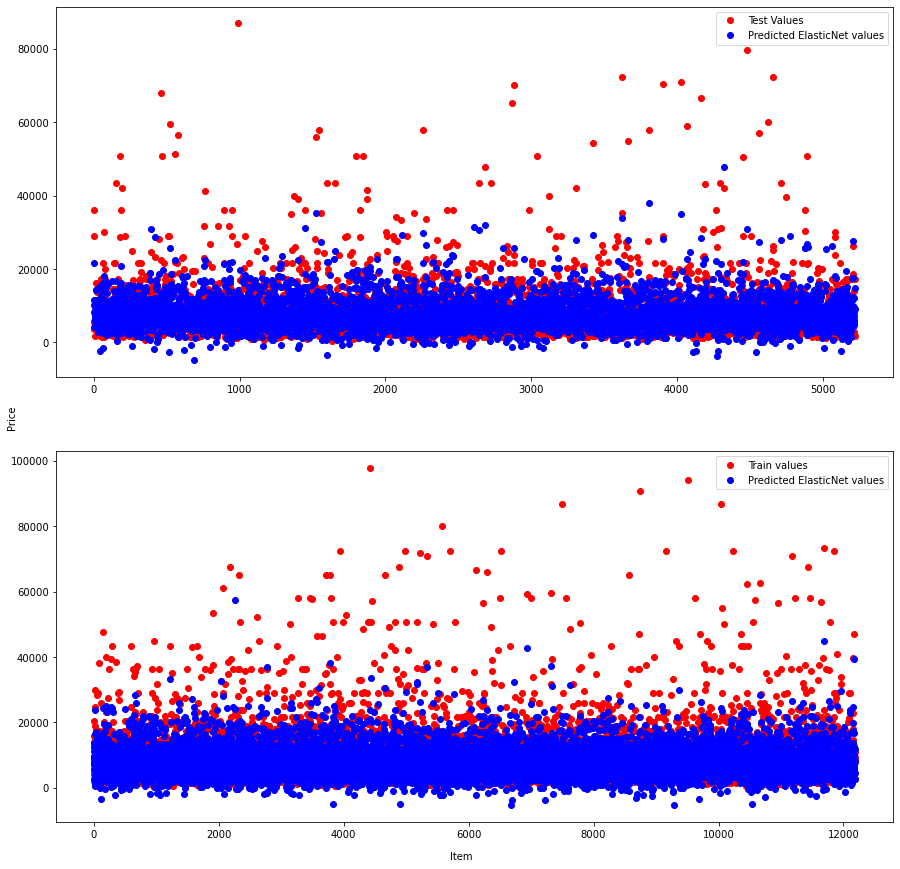

In [33]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted ElasticNet values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted ElasticNet values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price', va='center', rotation='vertical')
plt.show()

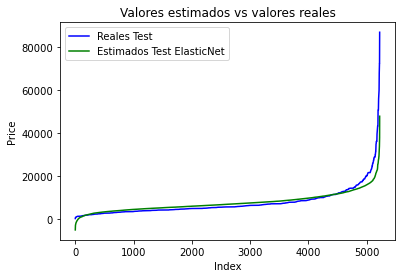

In [34]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(sm_prediction), color='green', label='Estimados Test ElasticNet')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

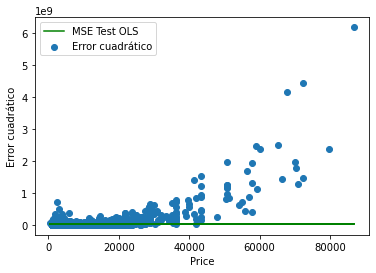

In [35]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ols=pow(y_test - sm_prediction,2)
plt.scatter(y_test,err_cuad_test_ols, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ols,len(err_cuad_test_ols)), label='MSE Test OLS', color='green')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Error cuadrático')
plt.show()

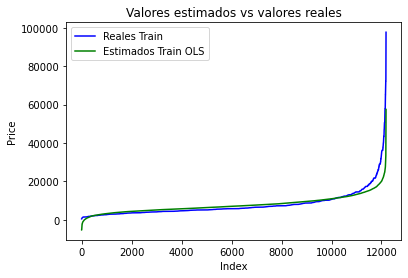

In [36]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(sm_prediction_train), color='green', label='Estimados Train OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

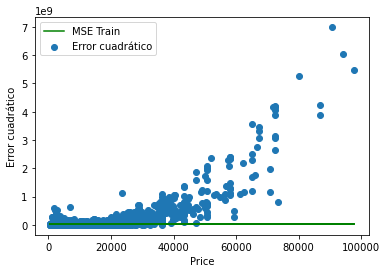

In [37]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ols=pow(y_train - sm_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ols, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ols,len(err_cuad_train_ols)), label='MSE Train', color='green')
plt.legend()
plt.xlabel('Price')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

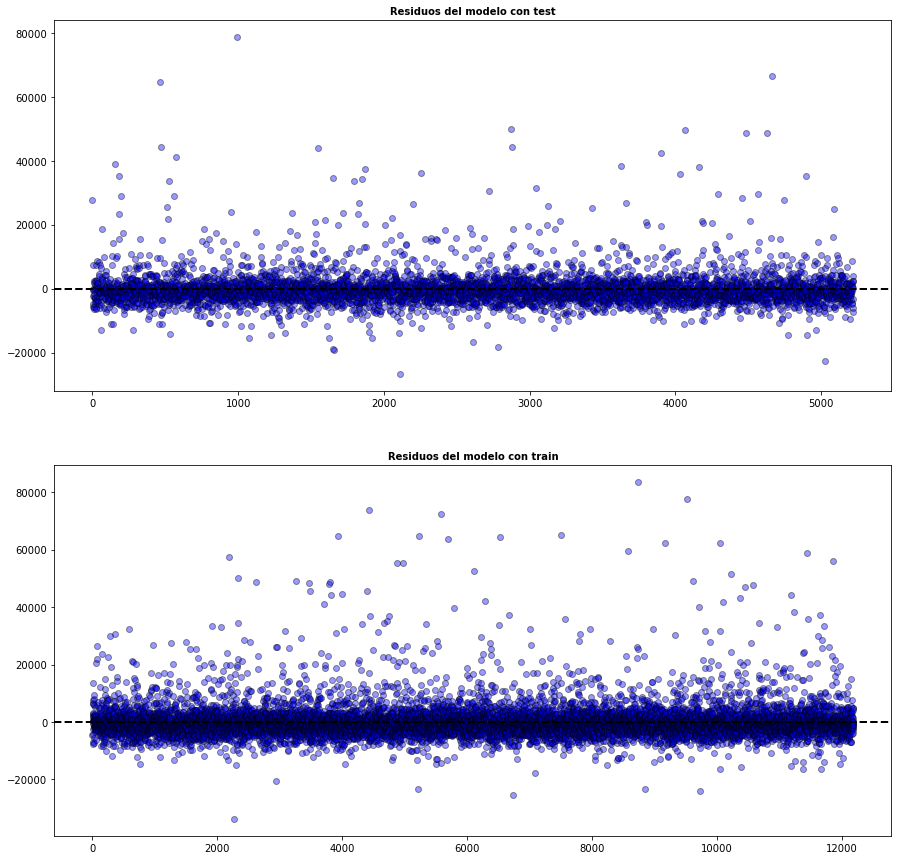

In [38]:
#Gráfico de los residuos/errores
model_residuals_test_ols = y_test - sm_prediction
model_residuals_train_ols = y_train - sm_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

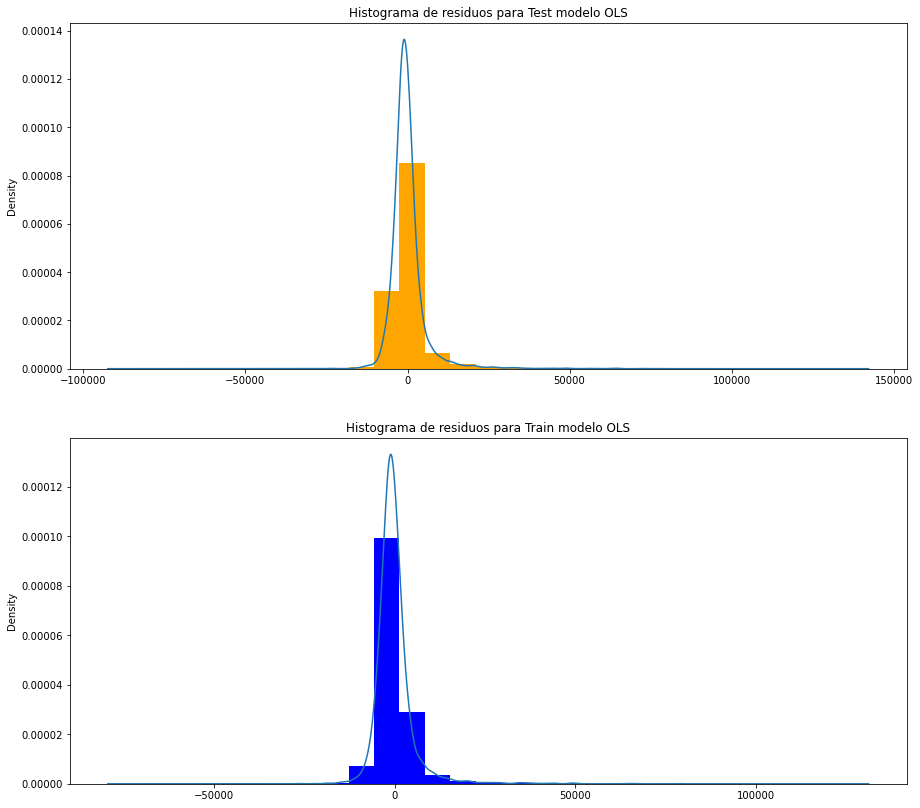

In [39]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ols.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ols.plot(kind = "kde",ax=ax2);
model_residuals_train_ols.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ols.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo OLS");
ax2.set_title("Histograma de residuos para Train modelo OLS");